In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import numpy as np

In [2]:
wolfr = pd.read_csv('archivos/Muestra4/wolfr_rgl.csv')
muestrac = pd.read_csv('archivos/Muestra/muestra_entrenamiento_final.csv')
candidatos = pd.read_csv('archivos/Candidatos1/predicciones_sin_fp.csv')
wolfr_id  = pd.read_csv('archivos/Crowther/CATALOGO_CROSSMATCH_GAIA-SIMBAD_con_crossmatchs.csv')
wolfr.shape

(240, 325)

In [4]:
print(list(candidatos.columns))
candidatos.shape

['source_id', 'ra', 'dec', 'parallax', 'Gaia_G-Gaia_Bp', 'Gaia_G-Gaia_Rp', 'Gaia_Bp-Gaia_Rp', 'Jmag-Hmag', 'Jmag-Kmag', 'Hmag-Kmag', 'W1-W2', 'Gaia_G', 'Gaia_Bp', 'Gaia_Rp', 'Jmag', 'Hmag', 'Kmag', 'W1', 'W2', 'prob_enn', 'prob_tomek', 'prob_smt', 'ponderacion']


(219, 23)

In [5]:
colores = ['Gaia_G-Gaia_Bp', 'Gaia_G-Gaia_Rp', 'Gaia_Bp-Gaia_Rp', 'Jmag-Hmag', 'Jmag-Kmag', 'Hmag-Kmag',
            'W1-W2']

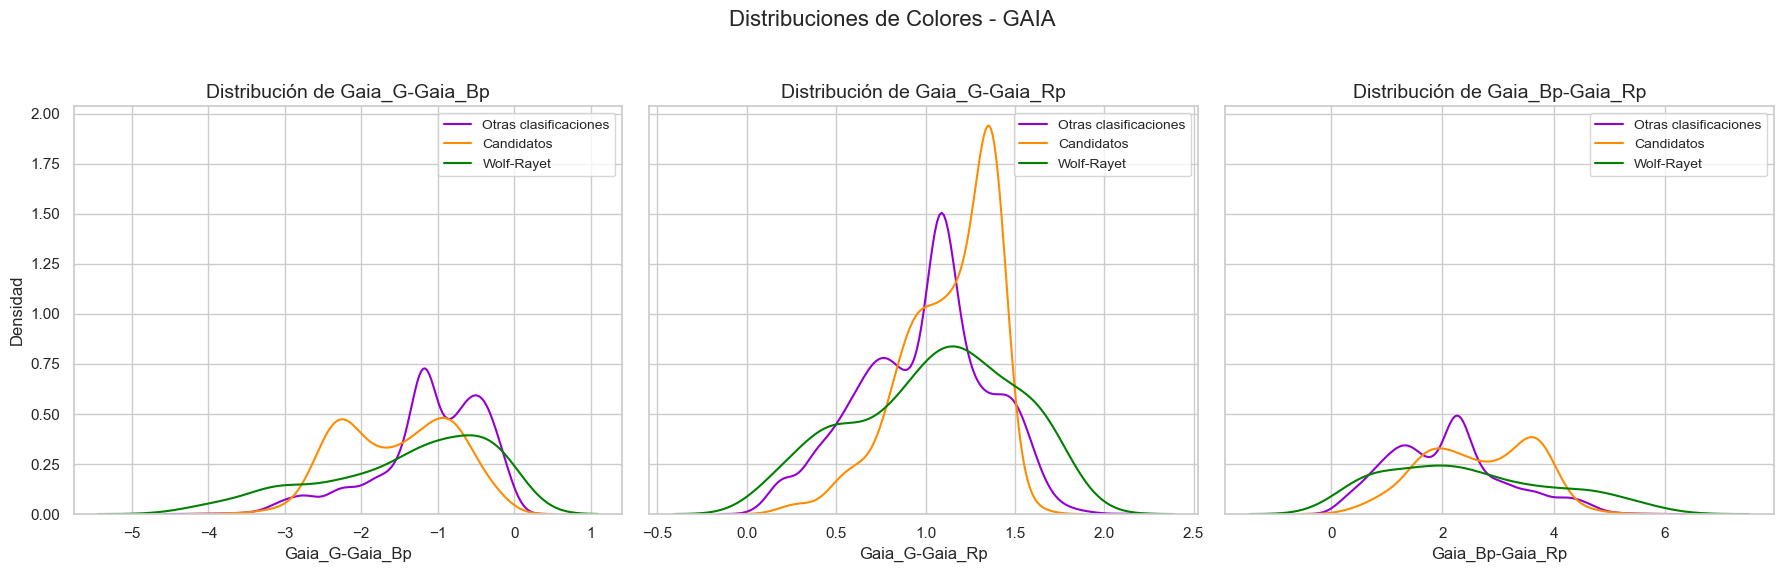

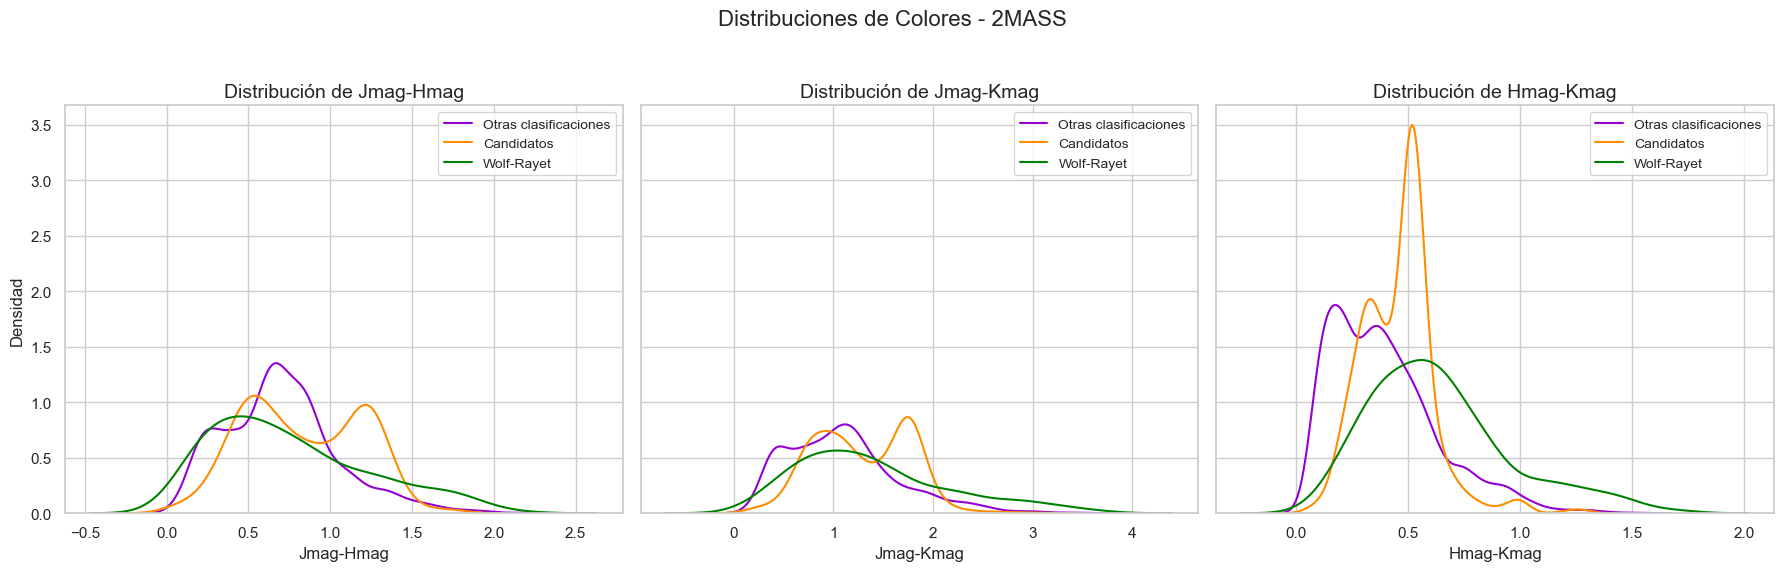

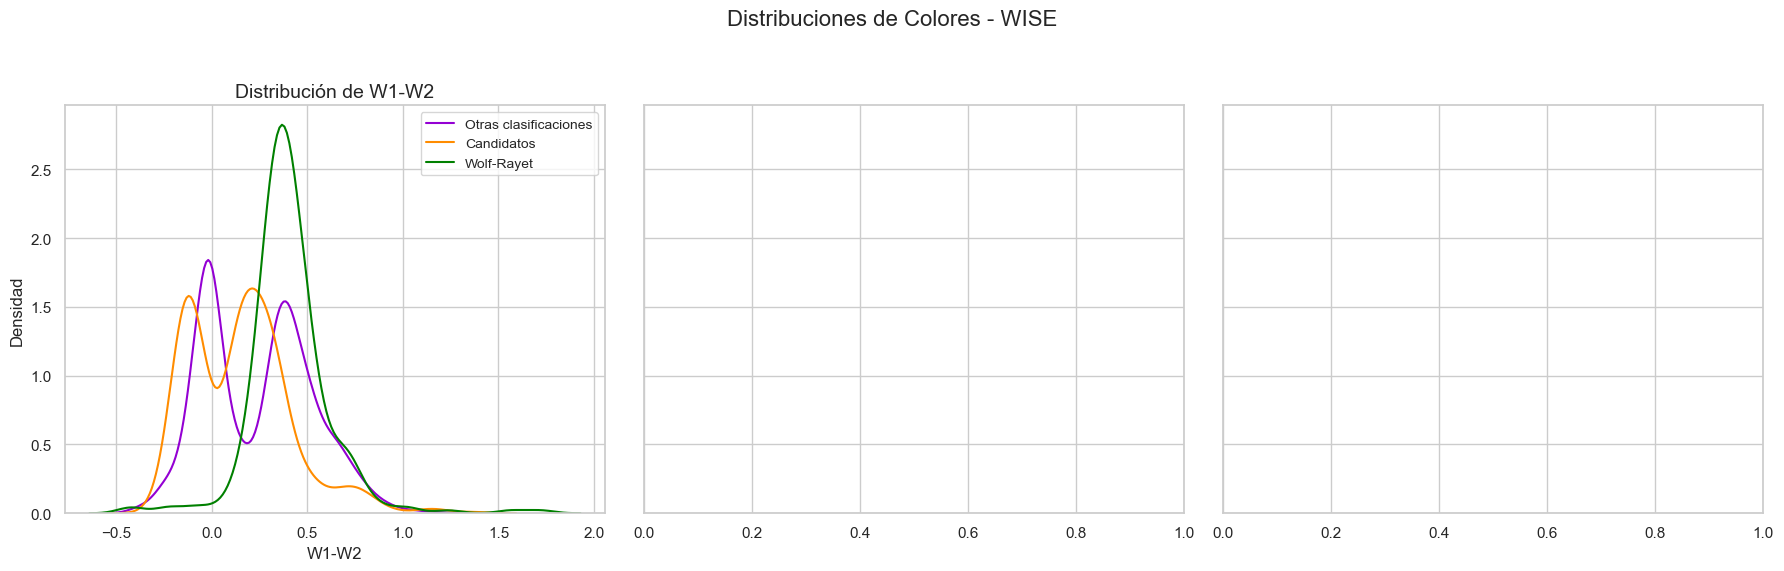

In [14]:
colores_gaia = ['Gaia_G-Gaia_Bp', 'Gaia_G-Gaia_Rp', 'Gaia_Bp-Gaia_Rp']
colores_tmass = ['Jmag-Hmag', 'Jmag-Kmag', 'Hmag-Kmag']
colores_wise = ['W1-W2']
misiones_colores = {
    "GAIA": colores_gaia,
    "2MASS": colores_tmass,
    "WISE": colores_wise
}
for mision, colores in misiones_colores.items():
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    sns.set(style="whitegrid")
    for i, color in enumerate(colores):
        sns.kdeplot(muestrac[color], label='Otras clasificaciones', color='darkviolet', ax=axes[i])
        sns.kdeplot(candidatos[color], label='Candidatos', color='darkorange', ax=axes[i])
        sns.kdeplot(wolfr[color], label='Wolf-Rayet', color='green', ax=axes[i])
        axes[i].set_title(f'Distribución de {color}', fontsize=14)
        axes[i].set_xlabel(color, fontsize=12)
        if i == 0:
            axes[i].set_ylabel('Densidad', fontsize=12)
        else:
            axes[i].set_ylabel('')
        axes[i].legend(fontsize=10, loc="upper right")
    fig.suptitle(f'Distribuciones de Colores - {mision}', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(f'graficos/histogramas_candidatos/{mision}_colores_lineas.png')
    plt.show()

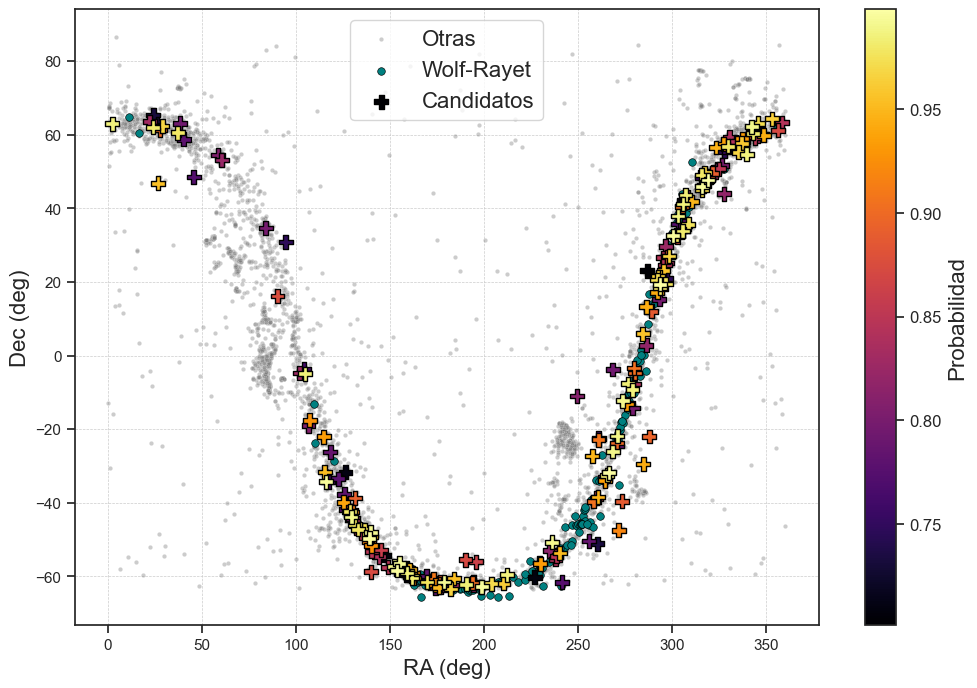

In [35]:

candidatos_ordenados = candidatos.sort_values(by='ponderacion', ascending=True)

plt.figure(figsize=(12, 8))
sns.set(style="ticks")

sns.scatterplot(x=muestrac['ra'], y=muestrac['dec'], label='Otras', marker='o', color='gray', alpha=0.4, s=10)

sns.scatterplot(x=wolfr['RA_deg'], y=wolfr['Dec_deg'], label='Wolf-Rayet', color='teal', alpha=1.0, s=30, edgecolor='black')

sc = plt.scatter(
    x=candidatos_ordenados['ra'], 
    y=candidatos_ordenados['dec'], 
    c=candidatos_ordenados['ponderacion'], 
    label='Candidatos', 
    cmap='inferno', 
    alpha=1.0, 
    marker='P', 
    s=100,  
    edgecolor='black'
)

plt.xlabel('RA (deg)', fontsize=16)
plt.ylabel('Dec (deg)', fontsize=16)
plt.legend(fontsize=16, loc="best")

cbar = plt.colorbar(sc)
cbar.set_label('Probabilidad', fontsize=16)
cbar.ax.tick_params(labelsize=12)

plt.grid(True, linestyle='--', linewidth=0.5)
plt.savefig('graficos/distribucion_candidatos/distribucion_espacial_RA_Dec_con_candidatos_mejorado.png', dpi=300, transparent=True)
plt.show()

In [3]:
scolores_gaia = ['Gaia_G-Gaia_Bp', 'Gaia_G-Gaia_Rp', 'Gaia_Bp-Gaia_Rp']
colores_tmass = ['Jmag-Hmag', 'Jmag-Kmag', 'Hmag-Kmag']

combinaciones_gaia = list(combinations(colores_gaia, 2))
combinaciones_tmass = list(combinations(colores_tmass, 2))

color_combinations = combinaciones_gaia + combinaciones_tmass
sns.set(style="white")

for color1, color2 in color_combinations:
    fig = plt.figure(figsize=(7, 5))
    
    # Scatter plot principal
    ax_scatter = plt.axes([0.08, 0.08, 0.55, 0.55])
    sns.scatterplot(x=muestrac[color1], y=muestrac[color2], label='Otras', color='red', alpha=0.4, s=10, ax=ax_scatter)
    sns.scatterplot(x=wolfr[color1], y=wolfr[color2], label='Wolf-Rayet', color='teal', edgecolor='black', alpha=0.8, s=20, ax=ax_scatter)
    ax_scatter.scatter(candidatos[color1], candidatos[color2], color='orange', s=30, edgecolor='black', label='Candidatos', alpha=1)
    ax_scatter.set_xlabel(color1, fontsize=10)
    ax_scatter.set_ylabel(color2, fontsize=10)
    ax_scatter.tick_params(axis='both', labelsize=8)
    ax_scatter.legend(fontsize=15, loc='best')

    # Histograma superior
    ax_histx = plt.axes([0.08, 0.66, 0.55, 0.25], sharex=ax_scatter)
    ax_histx.hist(muestrac[color1], bins=30, color='red', alpha=1, density=True, histtype='step', linewidth=1.2)
    ax_histx.hist(wolfr[color1], bins=30, color='teal', alpha=1, density=True, histtype='step', linewidth=1.2)
    ax_histx.hist(candidatos[color1], bins=30, color='orange', alpha=1, density=True, histtype='step', linewidth=1.2)
    ax_histx.tick_params(labelbottom=False)
    ax_histx.set_yticks([])

    # Histograma derecho
    ax_histy = plt.axes([0.66, 0.08, 0.25, 0.55], sharey=ax_scatter)
    ax_histy.hist(muestrac[color2], bins=30, color='red', alpha=1, density=True, orientation='horizontal', histtype='step', linewidth=1.2)
    ax_histy.hist(wolfr[color2], bins=30, color='teal', alpha=1, density=True, orientation='horizontal', histtype='step', linewidth=1.2)
    ax_histy.hist(candidatos[color2], bins=30, color='orange', alpha=1, density=True, orientation='horizontal', histtype='step', linewidth=1.2)
    ax_histy.tick_params(labelleft=False)
    ax_histy.set_xticks([])

    # Gráfico de densidad
    ax_density = plt.axes([0.66, 0.66, 0.25, 0.25])
    sns.kdeplot(x=muestrac[color1], y=muestrac[color2], ax=ax_density, color='red', alpha=0.6, linewidth=1.2)
    sns.kdeplot(x=wolfr[color1], y=wolfr[color2], ax=ax_density, color='teal', alpha=0.7, linewidth=1.2)
    sns.kdeplot(x=candidatos[color1], y=candidatos[color2], ax=ax_density, color='orange', alpha=1, linewidth=1.2)
    ax_density.set_xticks([])
    ax_density.set_yticks([])
    ax_density.set_xlabel('')
    ax_density.set_ylabel('')

    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
    plt.savefig(f'graficos/color-color_candidatos/{color1}_vs_{color2}_hist_density.png', dpi=300, transparent=True)
    plt.close()

C:\Users\diego\anaconda3\envs\tf_env\lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
C:\Users\diego\anaconda3\envs\tf_env\lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
C:\Users\diego\anaconda3\envs\tf_env\lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
C:\Users\diego\anaconda3\envs\tf_env\lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
C:\Users\diego\anaconda3\envs\tf_env\lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
C:\Users\diego\anaconda3\envs\tf_env\lib\site-packages\seaborn\distributions.py:1176: UserWarni

In [17]:
candidatos_filtered = candidatos[['source_id', 'ponderacion', 'ra', 'dec']]
output_file = 'archivos/Candidatos1/lista_candidatos.csv'
candidatos_filtered.to_csv(output_file, index=False)

In [ ]:
wolfr_filtered = wolfr.dropna(subset=['source_id'])[['source_id', 'ra', 'dec']]
wolfr_filtered.shape

In [ ]:
wolfr_filtered.to_csv('Archivos/Crowther/lista_wolfr.csv')